**Obrada informacija**: Prva laboratorijska vježba

Rijeke imaju veliki gospodarski značaj, od termoelektrana i nuklearnih elektrana kojima su rijeke nužne za rad, javne vodoopskrbe do poljoprivrede i transporta. Premda ljudi danas uvelike upravljaju vodotocima, uslijed vremenskih prilika ipak može doći do poplava, erozija tla i sličnih prirodnih nepogoda. Kako bismo se mogli na vrijeme pripremiti za potencijalne probleme, potrebno je istražiti ponašanje rijeka na temelju višegodišnjih praćenja vodostaja. U ovoj laboratorijskoj vježbi ćete analizirati vodostaje rijeke Save kroz period od 25 godina.

Unutar komprimiranog direktorija u kojem se nalazi ova bilježnica, nalazi se i .mat datoteka s podacima o vodostaju rijeke Save u periodu od 1.1.1982. do 31.12.2007. Svaki podatak označava jedan dan mjerenja vodostaja. 

Vježba se izvodi u Pythonu/Google Colabu, a sve naredbe potrebne za provedbu vježbe te njihova objašnjenja dana su u predavanju. Ova laboratorijska vježba nosi 3 boda. 

Kad ste gotovi s vježbom, na *Moodle* postavite .pdf izvješće s vježbe (.pdf izvješće možete generirati s naredbom File-Print-Location: PDF). 

**1.**	Učitajte biblioteke: NumPy, matplotlib.pyplot, scipy.fft, signal iz scipy te pywt.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
from scipy import fftpack
import  pywt

**2.**	Učitajte podatke o vodostaju iz .mat datoteke koja se nalazi unutar istog komprimiranog direktorija. Učitani podaci su spremljeni u rječnik. Izdvojite ključ i pripadne podatke o vodostajima te po potrebi smanjite dimenziju.

Savjet: .mat datoteku učitajte sa svog Google Drivea (unutar mape Colab Notebooks na svom Google Driveu postavite .mat datoteku). Ostali savjeti nalaze se u sljedećem programskom odsječku. 

In [2]:
#Učitavanje podataka iz lokalnog direktorija
from scipy import io
kobas_iz_matlaba = io.loadmat("./3_OIkobas.mat")
print(kobas_iz_matlaba)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Oct 10 13:46:29 2020', '__version__': '1.0', '__globals__': [], 'kobas': array([[661],
       [674],
       [685],
       ...,
       [242],
       [230],
       [228]], dtype=uint16)}


In [3]:
water_level = kobas_iz_matlaba['kobas']
water_level = np.squeeze(water_level)
print(water_level.size)
print(water_level.shape)

9496
(9496,)


**3.**	Ispišite: broj dana za koje postoje podaci o vodostajima, srednju vrijednost vodostaja, standardnu devijaciju, minimalnu vrijednost, maksimalnu vrijednost te median.

In [4]:
# podaci se nalaze pod ključem 'kobas' unutar rječnika kobas_iz_matlaba
print("Broj uzorkovanja:", len(water_level))
print("Srednja vrijednost uzorkovanja :", np.mean(water_level))
print("Standarda devijacija uzorkovanja:", np.std(water_level))
print("Minimalna vrijednost:", np.min(water_level))
print("Maksimalna vrijednost uzorkovanja", np.max(water_level))
print("Sortiranje podataka:", np.sort(water_level))
print("Medijan uzorkovanja:", np.median(water_level))

Broj uzorkovanja: 9496
Srednja vrijednost uzorkovanja : 294.25758213984835
Standarda devijacija uzorkovanja: 183.09167165945507
Minimalna vrijednost: 17
Maksimalna vrijednost uzorkovanja 878
Sortiranje podataka: [ 17  19  19 ... 877 877 878]
Medijan uzorkovanja: 255.0


**4.** Nacrtajte vodostaj. Obilježite x i y os te naslov slike. 

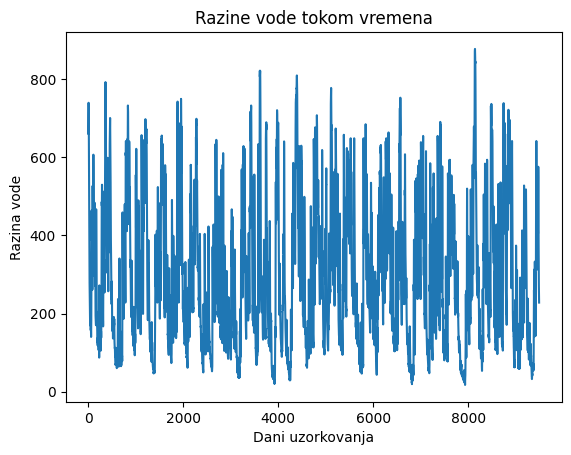

In [5]:
  plt.figure()
  plt.plot(water_level)
  plt.xlabel("Dani uzorkovanja")
  plt.ylabel("Razina vode")
  plt.title("Razine vode tokom vremena")
  plt.show()
  

**5.**	Izračunajte diskretnu Fourierovu transformaciju zadanog vodostaja. Ispišite dobivene vrijednosti. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata.

Fourierova transformacija vodostaja : [2794270.            -0.j           -9312.52756202+49784.33987081j
   80617.82235263-75905.53826228j ...  -75144.8689581 -18406.78122837j
   80617.82235263+75905.53826228j   -9312.52756202-49784.33987081j]


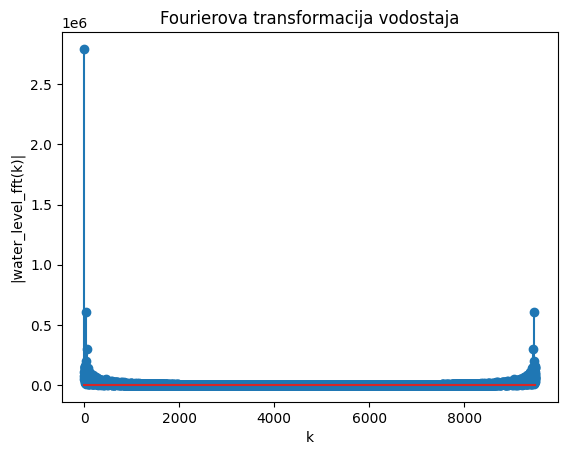

In [6]:
water_level_fft = fftpack.fft(water_level)
print(f"Fourierova transformacija vodostaja : {water_level_fft}")


plt.figure()
plt.stem(abs(water_level_fft))
plt.title("Fourierova transformacija vodostaja")
plt.xlabel("k")
plt.ylabel("|water_level_fft(k)|")
plt.show()

**6.**	Izračunajte Fourierovu transformaciju na vremenskom otvoru zadanog vodostaja koristeći pravokutni otvor širine 2 godine. Prikažite rezultat pomoću pcolormesh. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

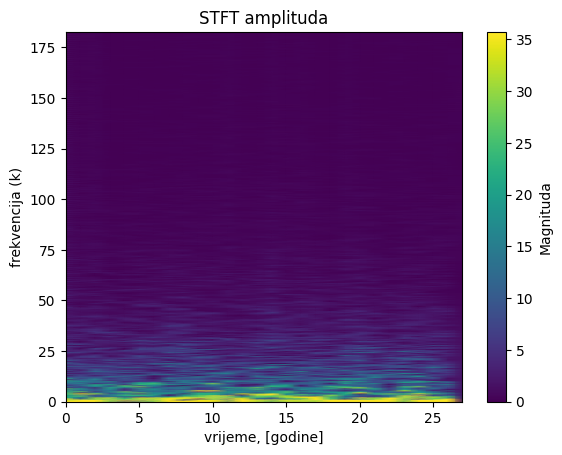

In [7]:
fs=365
T=730
window='boxcar'

f, t, Zxx = signal.stft(water_level, fs, window, nperseg=T) 

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx.max())/10, shading='gouraud')
plt.title("STFT amplituda")
plt.xlabel("vrijeme, [godine]")
plt.ylabel("frekvencija (k)")
plt.colorbar(label="Magnituda")

plt.show()

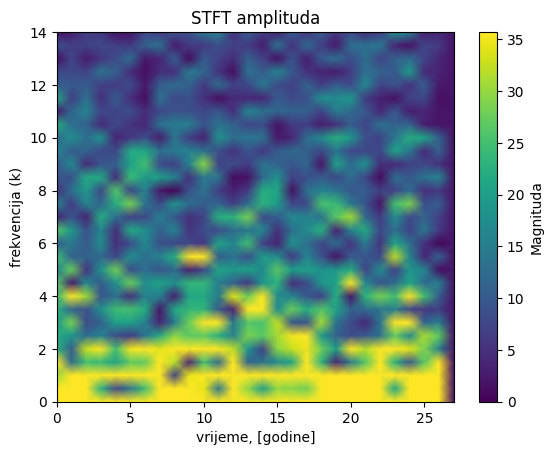

In [8]:
fs=365
T=730
window='boxcar'

f, t, Zxx = signal.stft(water_level, fs, window, nperseg=1*T ) 

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx.max())/10, shading='gouraud')
plt.title("STFT amplituda")
plt.xlabel("vrijeme, [godine]")
plt.ylabel("frekvencija (k)")
plt.colorbar(label="Magnituda")

plt.ylim([0, 14])
plt.show()

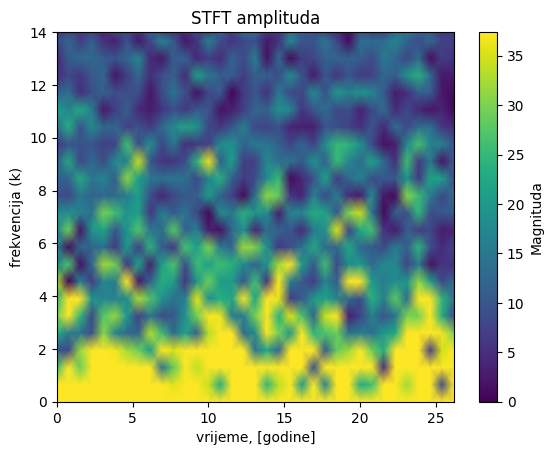

In [9]:
fs=365
T=730
window='boxcar'

f, t, Zxx = signal.stft(water_level, fs, window, nperseg=T/1.3 ) 

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx.max())/10, shading='gouraud')
plt.title("STFT amplituda")
plt.xlabel("vrijeme, [godine]")
plt.ylabel("frekvencija (k)")
plt.colorbar(label="Magnituda")

plt.ylim([0, 14])
plt.show()

ODGOVOR: Vidljive su frekvencije/godine:
 k = 1 -> 2 godine,
 k = 2 -> godina,
 k = 4 -> 6 mjeseci ,
 k = 5 -> (24/5) 4 mjeseci 24 dana,
 k = 6 ->4 mjeseca

**7.**	Upotrijebite drugu širinu otvora (po izboru) i ponovite prethodni zadatak. Ispišite koju širinu ste upotrijebili. Objasnite razlike u dobivenim slikama.

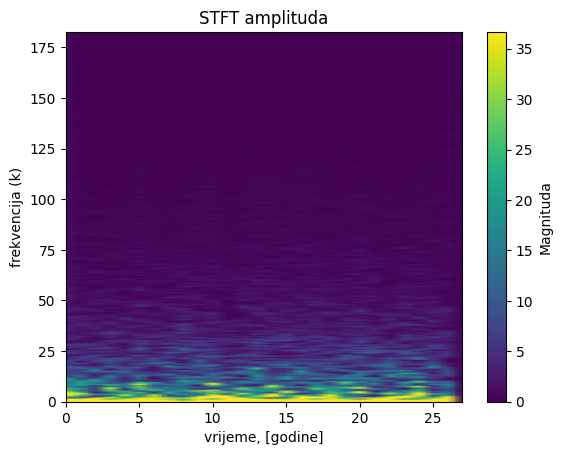

In [10]:
fs=365
T=730
window='hamming'

f, t, Zxx = signal.stft(water_level, fs, window, nperseg=T) 

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx.max())/10, shading='gouraud')
plt.title("STFT amplituda")
plt.xlabel("vrijeme, [godine]")
plt.ylabel("frekvencija (k)")
plt.colorbar(label="Magnituda")

plt.show()

ODGOVOR: Pod zadatakom 6 sam obavio ovo, kako bih bolje vizualizirao frekvencije koje su se pojavljivale  te kako bih mogao vijdeti trenutke u vremenu.
Uzeo sam vremenski okvir t*1 te t/1.3 , dok je temeljni period T dvije godine.
3*T period te vizualizacija frekvencijy u intervalu [0,16] je bila korisna kako bih zaključio koje se frekvencije pojavljuju. U oba slučaja je korišten 'boxcar' prozor, vizualizacija s npr Hamming prozorom i period T=730 slijedi.

**8.**	Ispišite sve obitelji kontinuiranih valića koje se nalaze u PyWavelets biblioteci. Na istoj slici, koristeći subplot naredbu, nacrtajte dvije valićne funkcije po izboru. U naslovu svake slike napišite o kojim valićima se radi.

Sve wavelet obitelji: ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
Sve opcije kontinuiranih  valića: ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


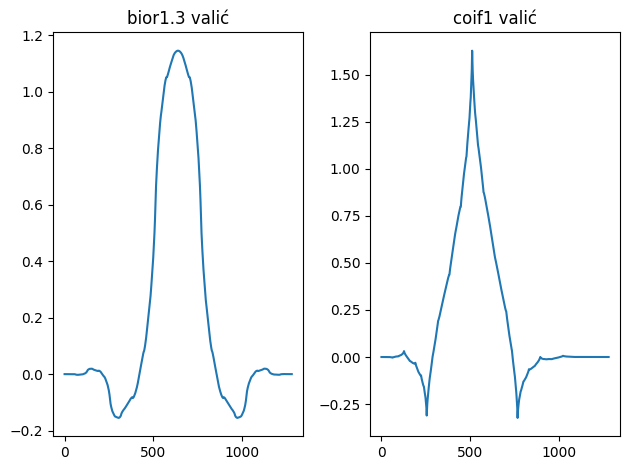

In [11]:
print("Sve wavelet obitelji:", pywt.families())
print("Sve opcije kontinuiranih  valića:", pywt.wavelist(kind='continuous'))
wavelet_1 = pywt.Wavelet('bior1.3')
wavelet_2 = pywt.Wavelet('coif1')
plt.subplot(1, 2, 1)
plt.plot(wavelet_1.wavefun()[0])
plt.title("bior1.3 valić")

plt.subplot(1, 2, 2)
plt.plot(wavelet_2.wavefun()[0])
plt.title("coif1 valić")
plt.tight_layout()
plt.show()

**9.**	Koristeći Morlet valić, odredite kontinuiranu valićnu transformaciju zadanog vodostaja. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

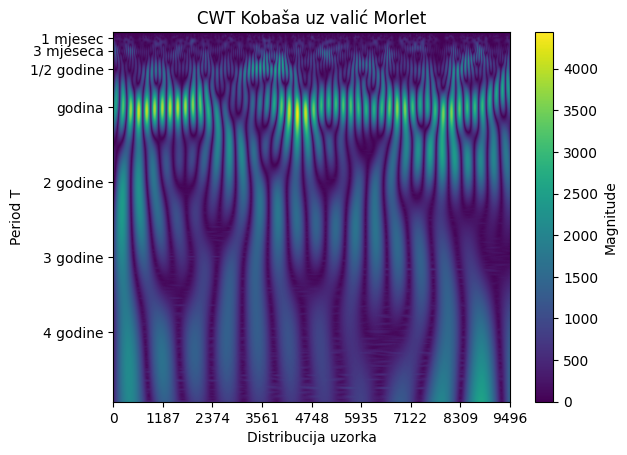

In [12]:

val = 'morl'
step=0.7
T=730

skala = np.arange(0.1,2*T,step=step)   
coefficients, frequencies = pywt.cwt(water_level, skala, val)

start_year = 1982
end_year = start_year + len(water_level)/365
years = np.arange(start_year, end_year, 3)

periods = 1 / np.array(frequencies) 
y_labels = ["1 mjesec", "3 mjeseca", "1/2 godine", "godina", "2 godine", "3 godine", "4 godine"]
y_positions = [30, 90, 180, 365, 2*365,3*365,4*365]  

plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(water_level), periods.max(), periods.min()])
plt.colorbar(label="Magnitude")
plt.title("CWT Kobaša uz valić Morlet")
plt.yticks(y_positions, y_labels)
plt.xticks(np.linspace(0, len(water_level), len(years)))
plt.xlabel("Distribucija uzorka")
plt.ylabel("Period T")
plt.show()


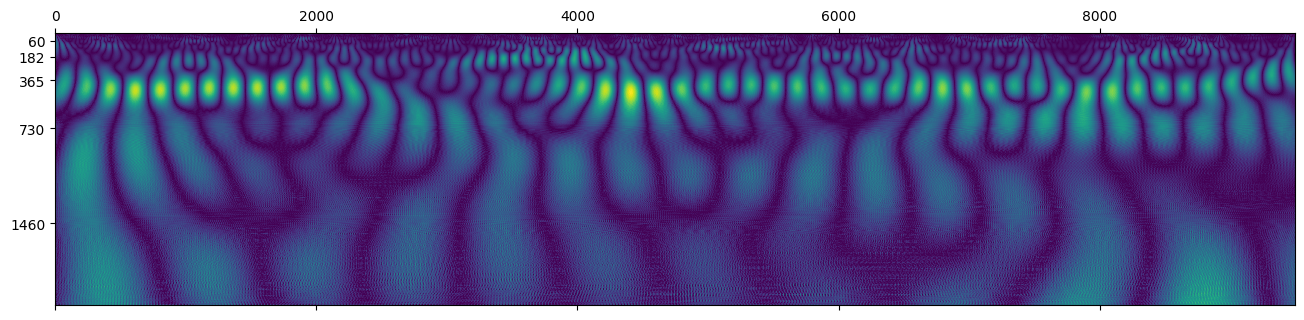

In [13]:
plt.matshow(abs(coefficients))
plt.yticks([T//12,T//4,T//2,T, 2*T])
plt.show()

ODGOVOR: Vidljive su frekvencije :
               -730 dana
               - 365 dana
               - 182 dana
               -60 dana


**10.**	Odgovorite: objasnite razliku u dobivenim rezultatima STFT i CWT.


ODGOVOR: Uočene su različite frekvencije na STFT, odnosno na CWT graphu.
CWT , odnosno kontinuirana valićna trasnformacija te STFT, Fourierova transformacija na vremenskom otvoru , u sebi imaju temelju razliku: prilagodba na podatke te vrsta signala.
SWFT funkcionira na temelju otvora,  coif1 te bior1.3 u mome slučaju, koji se prijenjuje na signal te se time 'pokriva' površina vala.
CWT   koristi valić (lokalna analizirajuća funkcija željenih svojstava) koji je translatiran i skaliran,u kodu koristio sam Morlet.
Iz SWFT grafa, mijenjanjem širine otvora, dolazimo do frekvencija te vremenskih trenutaka promjene, čime sam i zaključio frekvencije/godine kod SWFT grafa. 
Stegnuće valića određeno je kodom:

skala = np.arange(0.1,2*T,step=step)   

Razlika dolazi upravo iz načina na koji se signal transformia te je time CWT s Morlet valićem dao drukčije frekvencije.
STFT ima konstantnu rezoluciju s fiksnim prozorom ( stoga i možemo odrediti "bolje" ili "lošije" vremensku, odnosno frekvencijsku domenu).
CWT zbog skaliranja može bolje prikazati i niske/visoke rezolucije s viskim/niskom frekvencijama te je bolja u analizi različitih valova (ili nekonstantnih valova 
u nekoj domeni). 